In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [4]:
train_dir = "/content/drive/MyDrive/cars/data3a/training"
val_dir = "/content/drive/MyDrive/cars/data3a/validation"

In [5]:
img_width, img_height = 150, 150

In [6]:
epochs = 20
batch_size=32

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [9]:
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Flatten,
    Conv2D, MaxPooling2D
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# minor moderate and severe (3)
model.add(Dense(3, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, epochs=16, validation_data=val_generator)

Epoch 1/16
44/44 [==============================] - 247s 5s/step - loss: 1.1306 - accuracy: 0.3275 - val_loss: 1.1004 - val_accuracy: 0.3024
Epoch 2/16
44/44 [==============================] - 15s 333ms/step - loss: 1.0967 - accuracy: 0.3717 - val_loss: 1.0698 - val_accuracy: 0.4637
Epoch 3/16
44/44 [==============================] - 14s 322ms/step - loss: 1.0738 - accuracy: 0.4114 - val_loss: 0.9719 - val_accuracy: 0.5323
Epoch 4/16
44/44 [==============================] - 14s 324ms/step - loss: 1.0373 - accuracy: 0.4657 - val_loss: 0.9733 - val_accuracy: 0.5081
Epoch 5/16
44/44 [==============================] - 15s 333ms/step - loss: 1.0141 - accuracy: 0.4751 - val_loss: 1.0375 - val_accuracy: 0.4315
Epoch 6/16
44/44 [==============================] - 14s 321ms/step - loss: 1.0118 - accuracy: 0.5004 - val_loss: 0.9151 - val_accuracy: 0.5685
Epoch 7/16
44/44 [==============================] - 14s 325ms/step - loss: 1.0144 - accuracy: 0.4960 - val_loss: 0.9752 - val_accuracy: 0.5363
E

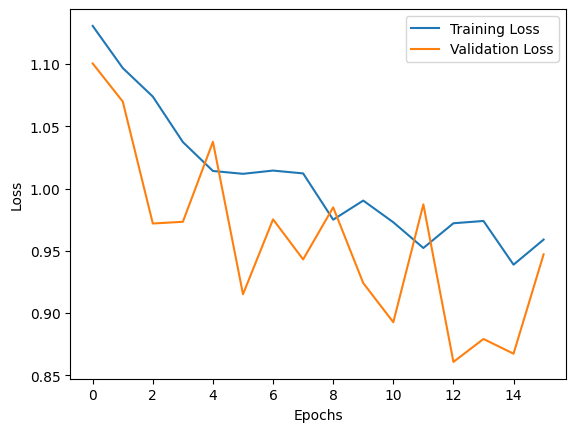

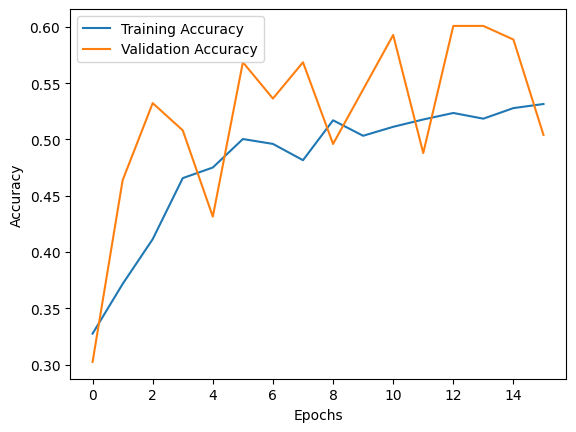

In [12]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

8/8 [==============================] - 0s 9ms/step
Confusion Matrix:


<ipython-input-13-2ac28ebcfcf2>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
<ipython-input-13-2ac28ebcfcf2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])


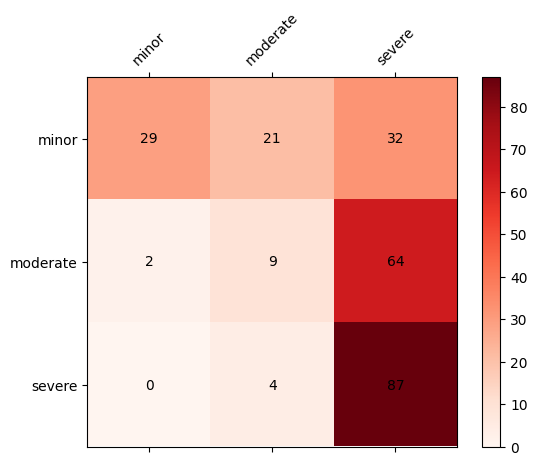

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.94      0.35      0.51        82
 02-moderate       0.26      0.12      0.17        75
   03-severe       0.48      0.96      0.64        91

    accuracy                           0.50       248
   macro avg       0.56      0.48      0.44       248
weighted avg       0.56      0.50      0.45       248



In [13]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)



from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [14]:
model.save('/content/drive/Mydrive/cars/damage_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


UnimplementedError: /content/drive/Mydrive; Operation not supported

In [ ]:
val_dir = '/content/drive/Mydrive/cars/data3a/validation'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1

    plt.axis('off')
    plt.show()
print('False: '+ str(negative) + '\nTrue: ' + str(positive))